<h1 align="center"> IST 5520 Project: Milestone 2 </h1>
<h3 align="center"> G5: Zach Brown, Rachel Fluegel, Xiaojing Ge, and Jing Sun </h3>

# 1. Introduction

### Busness Problem/Scenario

#### What is KickStarter?

Have you ever had an idea about creating something that improves on what something else already does, or even does something that has never been done before?  Lots of people do, but until recently, very few had the resources to make their visions into reality.  But the Internet, as it has evolved, has changed that.  Now, creators of all stripes — from musicians to graphic artists to designers to engineers — can get the funding that they need to bring their concepts to life.  And it comes from everyday people around the world, just like you.  One of the most popular places where this all happens is on the website Kickstarter.

Kickstarter is an online fundraising platform.  Creators post their projects, providing specifications for their finished product, potential risks and challenges, and progress updates.  Then, other people can donate money towards projects, usually earning a reward if the project meets its fundraising goal. As the website (https://techboomers.com) describes:

"Kickstarter is often referred to as a "crowdfunding" platform, and you may see us refer to it (and other services like it) as such.  Basically, "crowdfunding" is a business model where creators of a project or business solicit donations from a large number of people at once, thereby reducing the amount of money that each donor has to pay.  The worldwide and interconnected nature of the Internet makes this model easy to implement through websites like Kickstarter."
Kickstarter projects are spread across 15 diverse categories.  They may compose music, create gadgets, write books or comic books, or design the newest trendy fashions!

For backers that support a kickstarter project, they will get an inside look at the creative process, and help that project come to life. They also get to choose from a variety of unique rewards offered by the project creator. Rewards vary from project to project, but often include a copy of what is being produced (CD, DVD, book, etc.) or an experience unique to the project. However, there is no guarantee that people who post projects on Kickstarter will deliver on their projects, use the money to implement their projects, or that the completed projects will meet backers' expectations. Therefore, backers need to use their own judgment on supporting a project. This is also the reason we choose to investigate the patterns of selection dataset by using some business analytics methods.
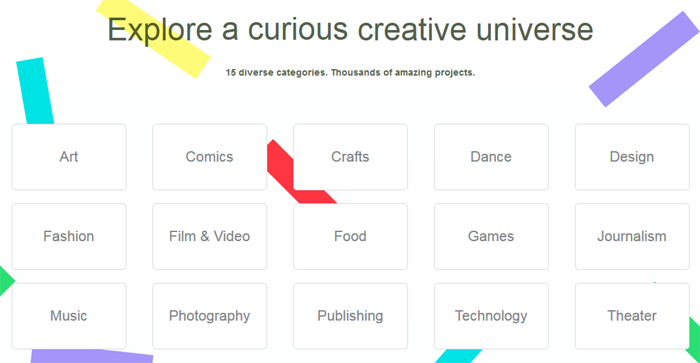

#### Business Scenario

Based on the dataset we found online (https://www.kaggle.com/toshimelonhead/400000-kickstarter-projects), in this project we want to conduct an exploratory study on the Kickstarter projects collected on the Kaggle website. Specifically, we want to answer the following research questions:

 - How can we build a predictive model to estimate how likely a project will be successful?
 - What is the percentage of each business group that was successful?
 - What variables are consistent through the successful/failed business category projects?
 - How much does each variable affect the end result of each business category?
 - Who can be benefit from the project?
 - Why would this analysis be important?




# 2. Data Source and Collection

### Data Source and Key Infomation

We first decided to import pandas so we can import the csv file and be able to clean and analyze the data later on in the project. 

In [1]:
import pandas as pd

Using Pandas, we can read the csv fle from the location its was saved after downloading it.

In [2]:
kickstarter = pd.read_csv("kickstarter.csv",
                         header = 0)

The C:\\... is where one person in our group saved the csv file to be able to import into Python. It will be different for everyone since we all will have it saved ina different place.

Let's show all the information that we downloaded in to the data frame.

In [3]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430938 entries, 0 to 430937
Data columns (total 30 columns):
Unnamed: 0                   430938 non-null int64
id                           430938 non-null int64
backers_count                430938 non-null int64
blurb                        430938 non-null object
currency                     430938 non-null object
goal                         430938 non-null float64
launched_at                  430938 non-null object
deadline                     430938 non-null object
location.country             429843 non-null object
name                         430934 non-null object
usd_pledged                  430938 non-null float64
slug                         430938 non-null object
spotlight                    430938 non-null bool
staff_pick                   430938 non-null bool
static_usd_rate              430938 non-null float64
state                        430938 non-null object
year                         430938 non-null int64
month     

As shown above, there are 430,938 observations and 30 variables in this Kickstarter data. 

Using the head() and transpose(), we can look at the first three rows of data to get a quick look at all the information in the data frame.

In [4]:
kickstarter.head(3).transpose()

,0,1,2
Unnamed: 0,0,1,2
id,857125548,1038659700,1238331911
backers_count,1,2,0
blurb,Exploring paint and its place in a digital world.,Mike Fassio wants a side-by-side photo of me a...,I need your help to get a nice graphics tablet...
currency,USD,USD,USD
goal,2000,10,900
launched_at,2015-03-19 22:34:57,2014-07-17 01:55:07,2014-07-30 16:29:13
deadline,2015-04-30 23:12:00,2014-07-27 01:55:07,2014-08-29 16:29:13
location.country,US,US,US
name,Remix,Photo of Grant and Hazel eating cake with bare...,Minecraft Digital Art/Animations


When looking at the three rows above can see all the information that has been entered, but we were wondering which variables mighthave missing values. To do this, we are going to use the apply() to see how many times Null is entered in each variable.

In [5]:
kickstarter.apply(lambda x: sum(x.isnull()), axis=0)

Unnamed: 0                      0
id                              0
backers_count                   0
blurb                           0
currency                        0
goal                            0
launched_at                     0
deadline                        0
location.country             1095
name                            4
usd_pledged                     0
slug                            0
spotlight                       0
staff_pick                      0
static_usd_rate                 0
state                           0
year                            0
month                           0
day                             0
hour                            0
days_to_deadline                0
goal_USD                        0
category_name                   0
category_slug                   0
blurb_length                    0
location_type                   0
location_country                0
location_state                  0
location_displayable_name       0
binary_state  

Above, we can see that name has Null 4 times and location.country has Null entered 1,095 times. Since there is only about ((1,095+4) / 430,938) .26% of observations with missing values, we can decided if we want to take them out during the cleaning phase. If we do decided to remove missiing values, the data frame would then no longer have any missing values to take into consideration. This could be an option for us since we would be taking out such a small amount of the data.  

### Meaning of Each Variable

- **id**: id of the kickstarter
- **backers_count**: number of backers
- **blurb**: product descriptions
- **currency**: currency used for project
- **goal**: goal amount in current currency
- **launched_at**: launch date of project
- **deadline**: project deadline
- **location.country**: location of origination
- **name**: name of project
- **usd_pledged**: amount pledged converted into USD dollars
- **slug**: project subcategory
- **spotlight**: whether or not this is a spotlight project (used for projects that have raised their funding goal
- **staff_pick**: whether Kickstarter designates project as a staff pick
- **static-usd-rate**: currency
- **state**: location state, province, etc.
- **year**: year of launch
- **month**: month of launch
- **day**: day of launch
- **hour**: hour of launch
- **days_to_deadline**: number of days until project deadline
- **goal_USD**: goal amount in USD
- **category_name**: category of Kickstarter
- **category_slug**: subcaetegory of the catergy of Kickstarter
- **blurb_length**: length of the blurb
- **location_type**: type of location that the Kickstarter originated
- **location_country**: location of the country
- **location_state**: location of the state
- **location_displayale_name**: universal display name of the city and state
- **binary_state**: true or false state of the Kickstarter


Some of the most usedful vaiables at first glace are going to be category_name, usd_pledged, goal, spotlight, and days_to_deadline.

Showing the summary statistics of the data frame to get a better understanding of the columns that are numeric

In [6]:
kickstarter.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,430938.0,2.037576e+03,1.184189e+03,0.000000,1009.0,2.026000e+03,3.065000e+03,4.095000e+03
id,430938.0,1.073657e+09,6.194721e+08,8624.000000,536561503.0,1.074770e+09,1.609176e+09,2.147476e+09
backers_count,430938.0,1.389502e+02,1.035447e+03,0.000000,2.0,1.700000e+01,7.100000e+01,2.193820e+05
goal,430938.0,4.883624e+04,1.103247e+06,0.010000,2000.0,5.000000e+03,1.600000e+04,1.000000e+08
usd_pledged,430938.0,1.210324e+04,1.047045e+05,0.000000,55.0,9.220000e+02,5.146987e+03,2.033899e+07
static_usd_rate,430938.0,1.007943e+00,2.286021e-01,0.008771,1.0,1.000000e+00,1.000000e+00,1.716408e+00
year,430938.0,2.015554e+03,2.184330e+00,2009.000000,2014.0,2.016000e+03,2.017000e+03,2.019000e+03
month,430938.0,6.192097e+00,3.371953e+00,1.000000,3.0,6.000000e+00,9.000000e+00,1.200000e+01
day,430938.0,1.507828e+01,8.851132e+00,1.000000,7.0,1.500000e+01,2.300000e+01,3.100000e+01
hour,430938.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00


# 3. Data Exploration
## 3.1. Data Clean

In [13]:
kickstarter = kickstarter.drop(['location.country', 'name'], axis = 1)
kickstarter.head(5).transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,857125548,1038659700,1238331911,189217262,1260075071
backers_count,1,2,0,0,1
blurb,Exploring paint and its place in a digital world.,Mike Fassio wants a side-by-side photo of me a...,I need your help to get a nice graphics tablet...,I want to create a Nature Photograph Series of...,I want to bring colour to the world in my own ...
currency,USD,USD,USD,USD,GBP
goal,2000,10,900,900,15000
launched_at,2015-03-19 22:34:57,2014-07-17 01:55:07,2014-07-30 16:29:13,2015-05-11 16:09:11,2015-02-06 21:52:02
deadline,2015-04-30 23:12:00,2014-07-27 01:55:07,2014-08-29 16:29:13,2015-05-31 16:09:11,2015-03-08 20:52:02
usd_pledged,25,6,0,0,1.52011
slug,remix,photo-of-grant-and-hazel-eating-cake-with-bare...,minecraft-digital-art-animations,nature-photograph-project,north-africa-art-project-my-dream


In the first part, we can see that name has Null 4 times and location.country has Null entered 1,095 times. Since there is only about ((1,095+4) / 430,938) .26% of observations with missing values, we decided to take them out, the dataframe then no longer have any missing values to take into consideration. 

In [14]:
kickstarter.spotlight = kickstarter['spotlight'].astype(int)

In [15]:
kickstarter.staff_pick = kickstarter['staff_pick'].astype(int)

Convert 'True', 'False' values in datafram as 1 for True and 0 for False

In [16]:
kickstarter['binary_state'].str.get_dummies()

,failed,successful
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
430933,0,1
430934,0,1
430935,1,0
430936,1,0


In [11]:
kickstarter['state'].str.get_dummies()

,canceled,failed,live,successful,suspended
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
430933,0,0,1,0,0
430934,0,0,1,0,0
430935,0,0,1,0,0
430936,0,0,1,0,0


By looking at the table above, we can see that there are some dumplication between state and binary_state variable. Therefore, we can drop binary_state column. The final dataframe should look like this:

In [17]:
new_kickstarter = pd.concat([kickstarter, pd.get_dummies(kickstarter['state'])], axis=1)
new_kickstarter = new_kickstarter.drop(['binary_state','state'], axis=1)
new_kickstarter.head(5).transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,857125548,1038659700,1238331911,189217262,1260075071
backers_count,1,2,0,0,1
blurb,Exploring paint and its place in a digital world.,Mike Fassio wants a side-by-side photo of me a...,I need your help to get a nice graphics tablet...,I want to create a Nature Photograph Series of...,I want to bring colour to the world in my own ...
currency,USD,USD,USD,USD,GBP
goal,2000,10,900,900,15000
launched_at,2015-03-19 22:34:57,2014-07-17 01:55:07,2014-07-30 16:29:13,2015-05-11 16:09:11,2015-02-06 21:52:02
deadline,2015-04-30 23:12:00,2014-07-27 01:55:07,2014-08-29 16:29:13,2015-05-31 16:09:11,2015-03-08 20:52:02
usd_pledged,25,6,0,0,1.52011
slug,remix,photo-of-grant-and-hazel-eating-cake-with-bare...,minecraft-digital-art-animations,nature-photograph-project,north-africa-art-project-my-dream


Some useful information from that summary statistics above has to do with days_to_deadline, usd_pledged, and goal. All three of these will be useful so we can see the mean, max, and min of the goals from all the observations and be able to make analysis and predictions from these numbers for new people using Kickstarter can see and understand so, they can also be sucessful. 

### High Level Requirments

Some of the hig level requirments that we will have to do later on in the project include cleaning the data, transforming the data, splitting the data into their category_names and looking at different variables, and regression and predictive analysis. Cleaning and transforming the data will help us make the data easier to work with and read as we split it up and look at key variables. Splitting up the data into different categories will allow us to do regression and predictive analysis on the different categories. This will always us to make specific analysis on the categories instead of the overall data. The specific information will be helpful to new users of Kickstarter and anyone else, state holders, trying to become sucessful in starting up their own project.